In [70]:
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
sys.path
sys.path.append('/Users/chenglingyun/Desktop/interactive-anomaly-detection/examples')
from intand import datasets, Evaluation, feedback_loop
from intand.ensembles import IsoForest
from intand.models import Unsupervised, OJRank, OMD, AAD, PAD

import intand
print("VERSION:", intand.__version__)



VERSION: 0.1.0


In [71]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
import copy
import math
from sklearn import metrics

In [88]:
#covered in load data ()
X, y = datasets.load_dataset('shuttle', normalize=True)

In [89]:
X.shape

(12345, 9)

In [90]:
y.shape

(12345,)

In [6]:
Z1 = IsoForest(n_trees=1).fit(X).transform(X)
Z1

array([[0.54393383],
       [0.71298624],
       [0.41687897],
       ...,
       [0.39871146],
       [0.43573596],
       [0.54393383]])

In [8]:
Z1.shape

(1920, 1)

In [26]:
My_pred=np.full((X.shape[0], 1), -1)
anomaly_ind=np.argsort(Z1,axis=0)[-(int (0.1*X.shape[0])):]
My_pred[anomaly_ind]=1

In [27]:
pseudoy = np.ravel(My_pred ,order='C')
pseudoy

array([-1,  1, -1, ..., -1, -1, -1])

In [11]:
unique,counts=np.unique(pseudoy,return_counts=True)
t=dict(zip(unique,counts))
t

{-1: 1728, 1: 192}

In [28]:
clf = RandomForestClassifier(n_estimators=50, random_state=1)

In [29]:
scores = clf.fit(X, pseudoy ).predict_proba(X)[:, 1]

In [30]:
Z1=scores
Z1

array([0.  , 0.94, 0.  , ..., 0.  , 0.  , 0.02])

In [31]:

Z = np.asmatrix(Z1)
Z=np.transpose(Z)
Z

matrix([[0.  ],
        [0.94],
        [0.  ],
        ...,
        [0.  ],
        [0.  ],
        [0.02]])

In [43]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = -lof.fit_predict(X)
y_pred

array([-1,  1, -1, ..., -1, -1, -1])

#unnecessary data info
unique, counts = np.unique(My_pred, return_counts=True)
t=dict(zip(unique, counts))
t

In [6]:
n = X.shape[0]
root = int(math.sqrt(n))

In [28]:
for _ in range(5):
    Z1 = IsoForest(n_trees=1).fit(X).transform(X)
    My_pred=np.full((X.shape[0], 1), -1)
    anomaly_ind=np.argsort(Z1,axis=0)[-(int (0.1*X.shape[0])):]
    My_pred[anomaly_ind]=1
    pseudoy = np.ravel(My_pred ,order='C')
    clf = RandomForestClassifier(n_estimators=50, random_state=1)
    scores = clf.fit(X, pseudoy ).predict_proba(X)[:, 1]
    Z = np.asmatrix(scores)
    Z=np.transpose(Z)

    eva.run([PAD(Z,pseudoy,i,X)])
pre=eva.plot_precision(name + ".json", "precision")

Total: 58 (2 anomalies, 56 nominals))

In [29]:
pre

{'PAD': [[0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   3.4482758620689653,
   6.896551724137931,
   6.896551724137931,
   6.896551724137931,
   6.896551724137931,
   6.896551724137931,
   10.344827586206897,
   13.793103448275861,
   13.793103448275861,
   17.24137931034483,
   20.689655172413794,
   24.137931034482758,
   27.586206896551722,
   27.586206896551722,
   27.586206896551722,
   27.586206896551722,
   31.03448275862069,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   34.48275862068966,
   37.93103448275862,
   37.93103448275862,
   37.93103448275862,
   37.93103448275862,
   37.93103448275862,
   37.93103448275862,
   37.93103448275862,
   37.93103448275862,
   37.93103448275862,
   37.9310344827586

In [32]:
pv = np.matrix(pre['PAD'])

In [33]:
pv.shape

(25, 58)

In [42]:
x = np.arange(pv.shape[1])
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57])

In [51]:
#y = np.mean(pv, axis = 0)
y = np.ravel(np.mean(pv, axis = 0))
y

array([ 0.13793103,  0.4137931 ,  0.82758621,  1.93103448,  3.03448276,
        4.68965517,  6.34482759,  8.        ,  8.96551724, 10.20689655,
       11.5862069 , 13.37931034, 15.5862069 , 18.06896552, 19.5862069 ,
       21.37931034, 22.89655172, 24.4137931 , 25.79310345, 27.44827586,
       28.82758621, 30.75862069, 32.4137931 , 33.65517241, 35.03448276,
       36.        , 37.24137931, 38.06896552, 38.48275862, 38.89655172,
       39.31034483, 39.5862069 , 40.55172414, 41.37931034, 41.93103448,
       42.34482759, 42.75862069, 43.17241379, 43.31034483, 43.44827586,
       43.5862069 , 43.5862069 , 43.5862069 , 44.13793103, 44.27586207,
       44.27586207, 44.68965517, 44.82758621, 45.24137931, 45.51724138,
       45.79310345, 45.93103448, 46.06896552, 46.20689655, 46.48275862,
       46.75862069, 46.75862069, 47.03448276])

In [52]:

metrics.auc(x,y)

1803.0344827586212

In [91]:
p = []
e = []
for i in range(3, root, 2):
    name = "myExperiment-iF-k" + str(i) +'-shuttle'
    eva = Evaluation(y, expname=name)

    for _ in range(20):
        Z1 = IsoForest().fit(X).transform(X)
        My_pred=np.full((X.shape[0], 1), -1)
        anomaly_ind=np.argsort(Z1,axis=0)[-(int (0.1*X.shape[0])):]
        My_pred[anomaly_ind]=1
        pseudoy = np.ravel(My_pred ,order='C')
        clf = RandomForestClassifier(n_estimators=50, random_state=1)
        scores = clf.fit(X, pseudoy ).predict_proba(X)[:, 1]
        Z = np.asmatrix(scores)
        Z=np.transpose(Z)

        eva.run([PAD(Z,pseudoy,i,X)]) # budget is None : min(2 * self.n_anomalies, 100)
    pre=eva.plot_precision(name + ".json", "precision")
    pv = np.matrix(pre['PAD'])
    #p_end = pvmatrix[:,-1].mean()
    x1 = np.arange(pv.shape[1])
    y1 = np.ravel(np.mean(pv, axis = 0))
    p_auc = metrics.auc(x1,y1)
    p.append(p_auc)
    eff=eva.plot_effort(name + ".json", "precision")
    ev = np.matrix(eff['PAD'])
    #e_end = evmatrix[:,-1].mean()
    x2 = np.arange(ev.shape[1])
    y2 = np.ravel(np.mean(ev, axis = 0))
    e_auc = metrics.auc(x2,y2)
    e.append(e_auc)

Total: 100 (39 anomalies, 61 nominals)

In [93]:
plt.figure(1) 

plt.subplot(211)  
plt.plot(k,p,'b')
#plt.xlabel('Nbr. of Neighbours(k)')
plt.ylabel('Precision Curve AUC')
plt.title('Average AUC values after 20 rounds')
plt.grid(True)

plt.subplot(212)
plt.plot(k,e,'r')
plt.xlabel('Nbr. of Neighbours(k)')
plt.ylabel('Expert Effort Curve AUC')

plt.grid(True)
#plt.title('Evaluation results after 10 rounds with 70 budgets')
plt.savefig('20_rounds_auc_shuttle.png')
plt.show()

/Users/chenglingyun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenglingyun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


In [67]:
k = []
for i in range(3, 43, 2):
    k.append(i)

<IPython.core.display.Javascript object>


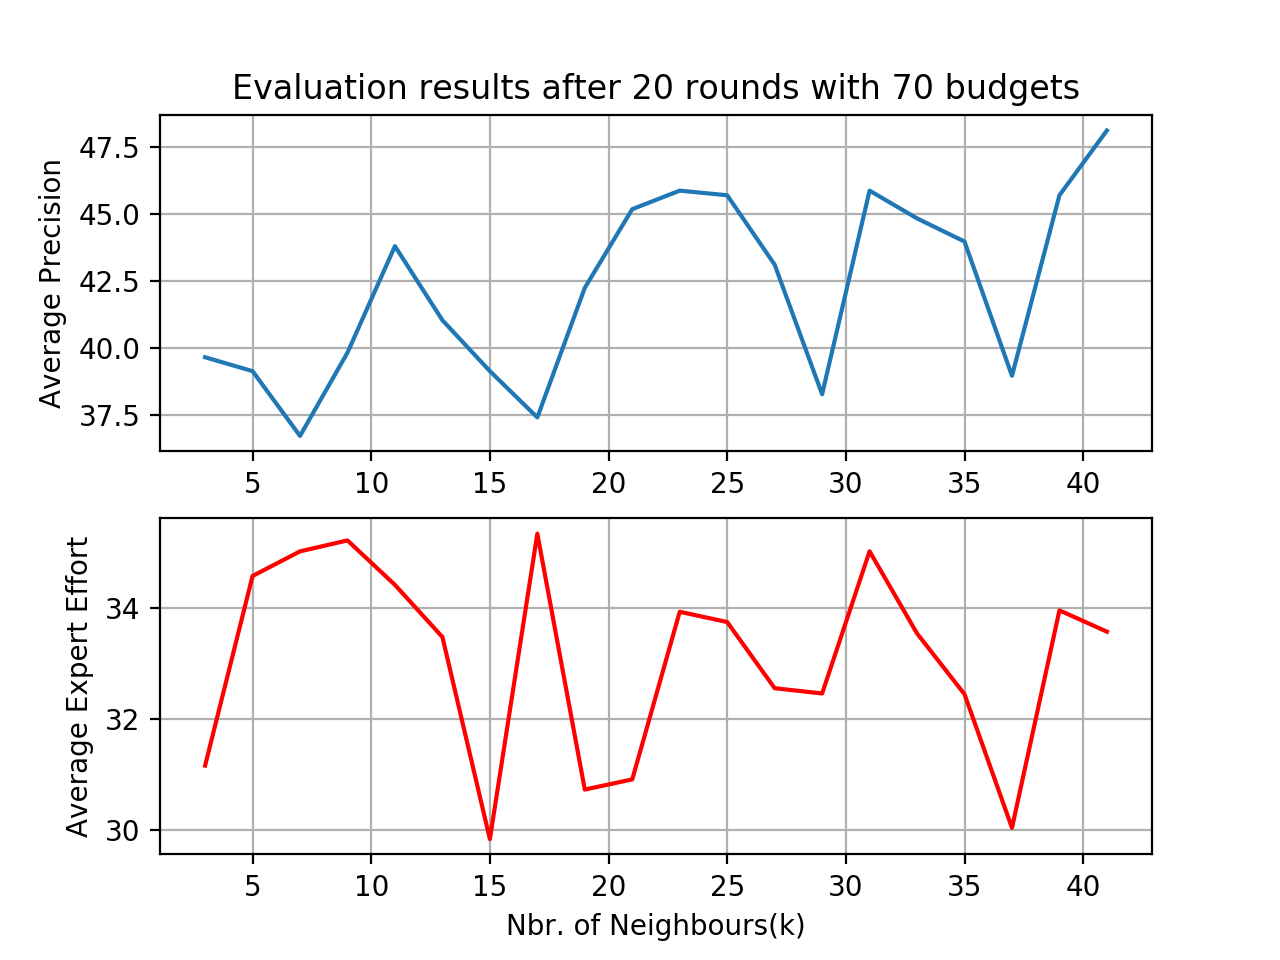

In [27]:
plt.figure(3) 

plt.subplot(211)  
plt.plot(k,p)
#plt.xlabel('Nbr. of Neighbours(k)')
plt.ylabel('Average Precision')
plt.title('Evaluation results after 20 rounds with 70 budgets')
plt.grid(True)

plt.subplot(212)
plt.plot(k,e,'r')
plt.xlabel('Nbr. of Neighbours(k)')
plt.ylabel('Average Expert Effort')

plt.grid(True)
#plt.title('Evaluation results after 20 rounds with 70 budgets')

plt.show()

<IPython.core.display.Javascript object>


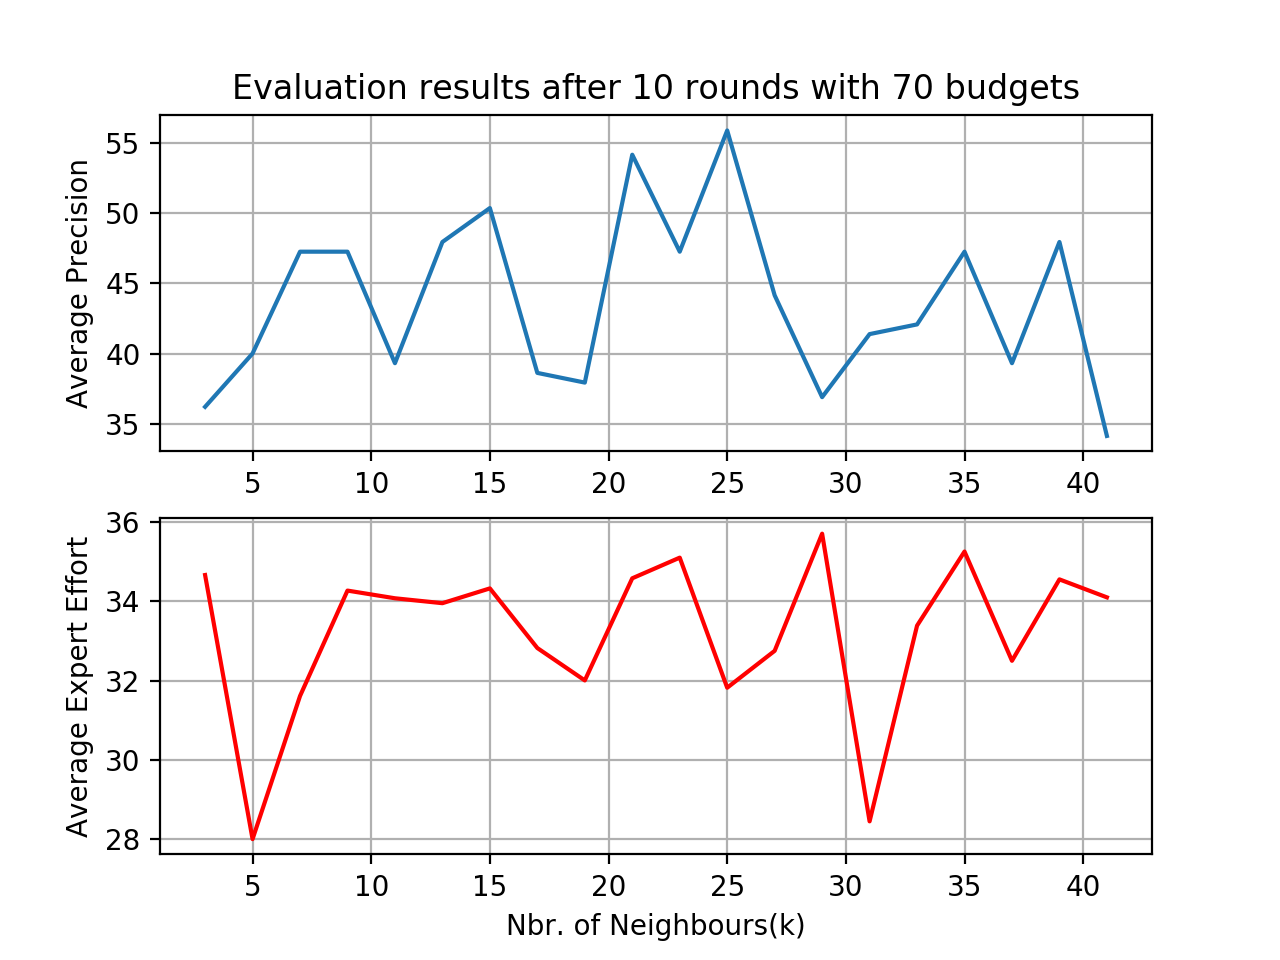

In [25]:
plt.figure(2) 

plt.subplot(211)  
plt.plot(k,p)
#plt.xlabel('Nbr. of Neighbours(k)')
plt.ylabel('Average Precision')
plt.title('Evaluation results after 10 rounds with 70 budgets')
plt.grid(True)

plt.subplot(212)
plt.plot(k,e,'r')
plt.xlabel('Nbr. of Neighbours(k)')
plt.ylabel('Average Expert Effort')

plt.grid(True)
#plt.title('Evaluation results after 5 rounds with 70 budgets')

plt.show()

<IPython.core.display.Javascript object>


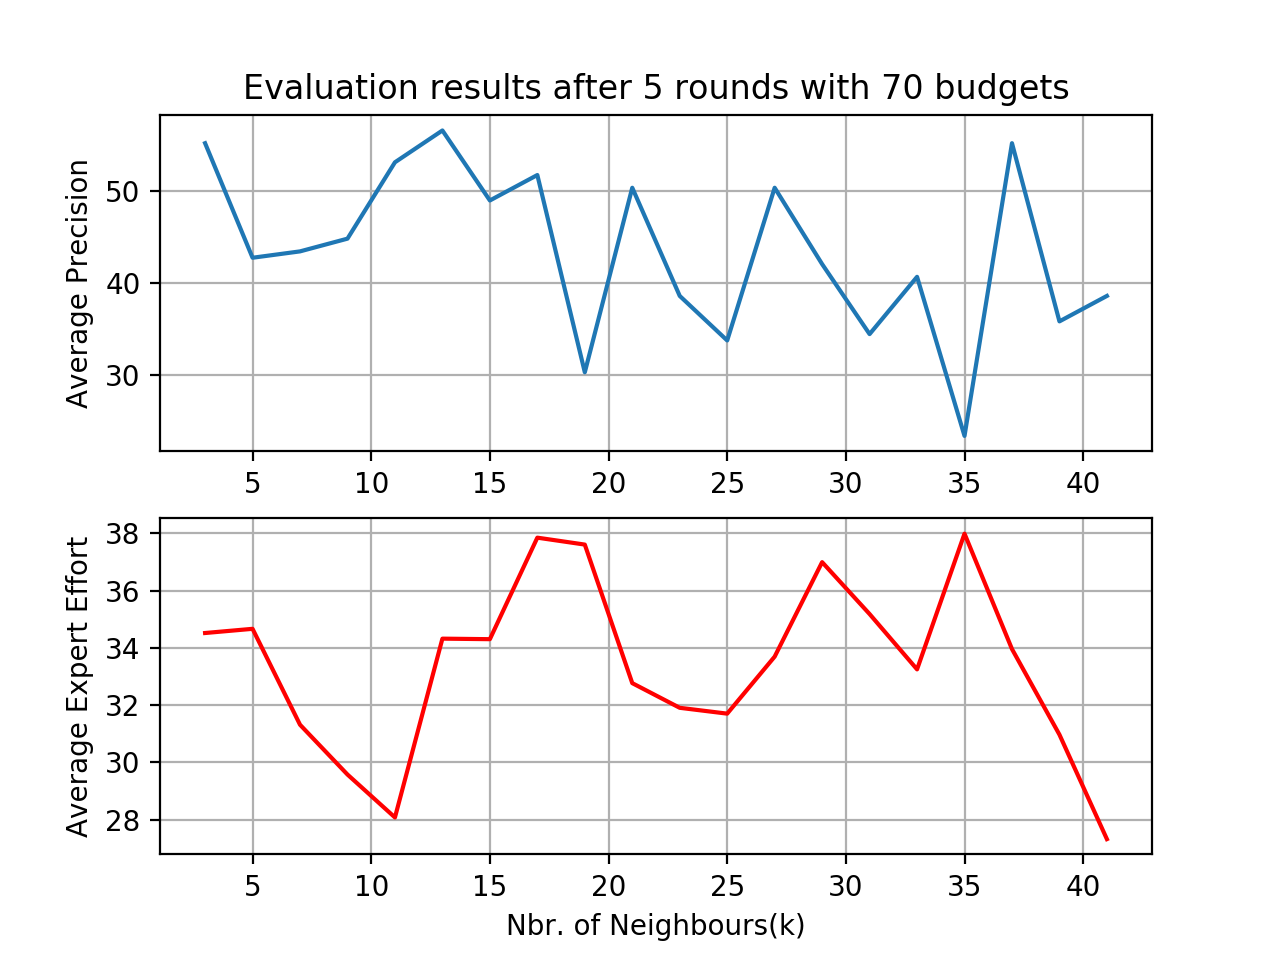

In [23]:
plt.figure(1) 

plt.subplot(211)  
plt.plot(k,p)
#plt.xlabel('Nbr. of Neighbours(k)')
plt.ylabel('Average Precision')
plt.title('Evaluation results after 5 rounds with 70 budgets')
plt.grid(True)

plt.subplot(212)
plt.plot(k,e,'r')
plt.xlabel('Nbr. of Neighbours(k)')
plt.ylabel('Average Expert Effort')

plt.grid(True)
#plt.title('Evaluation results after 5 rounds with 70 budgets')
plt.show()

In [12]:
plt.plot(k,e)
plt.xlabel('Nbr. of Neighbours(k)')
plt.ylabel('Average Expert Effort of 5 rounds with 70 budgets')
plt.show()

In [28]:
p_end

42.758620689655174

In [15]:
p=eva.plot_precision(name + ".json", "precision")
pv = p['PAD']
len(pv)

5

In [17]:
pvmatrix = np.matrix(pv)
pvmatrix.shape

(5, 58)

In [20]:
pends = pvmatrix[:,-1]
pends

matrix([[51.72413793],
        [58.62068966],
        [51.72413793],
        [24.13793103],
        [51.72413793]])

In [22]:
p_end = pends.mean()
p_end

47.58620689655172

In [27]:
p = p.append(p_end)
p

AttributeError: 'NoneType' object has no attribute 'append'

<IPython.core.display.Javascript object>


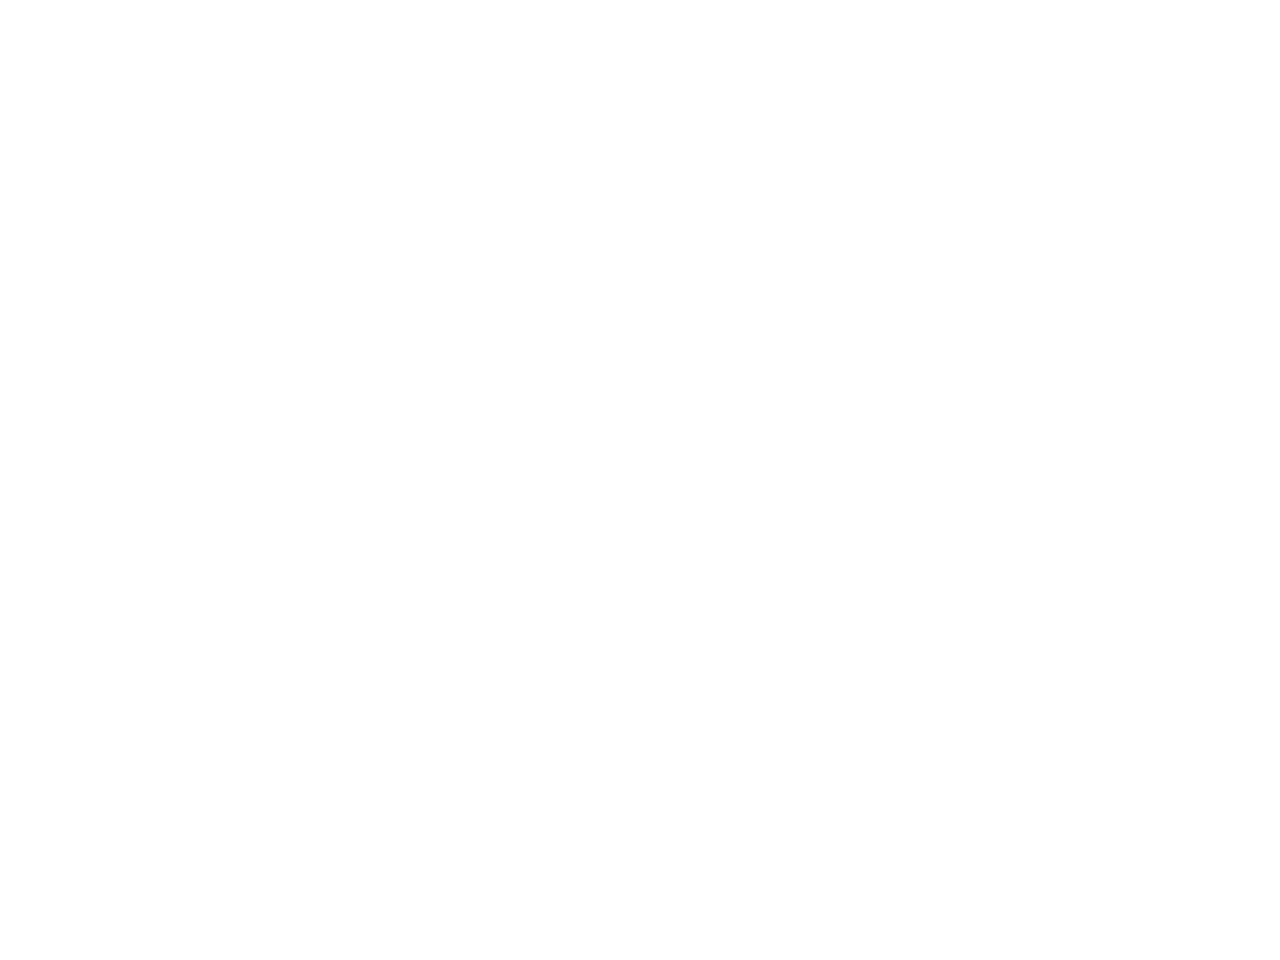

<IPython.core.display.Javascript object>


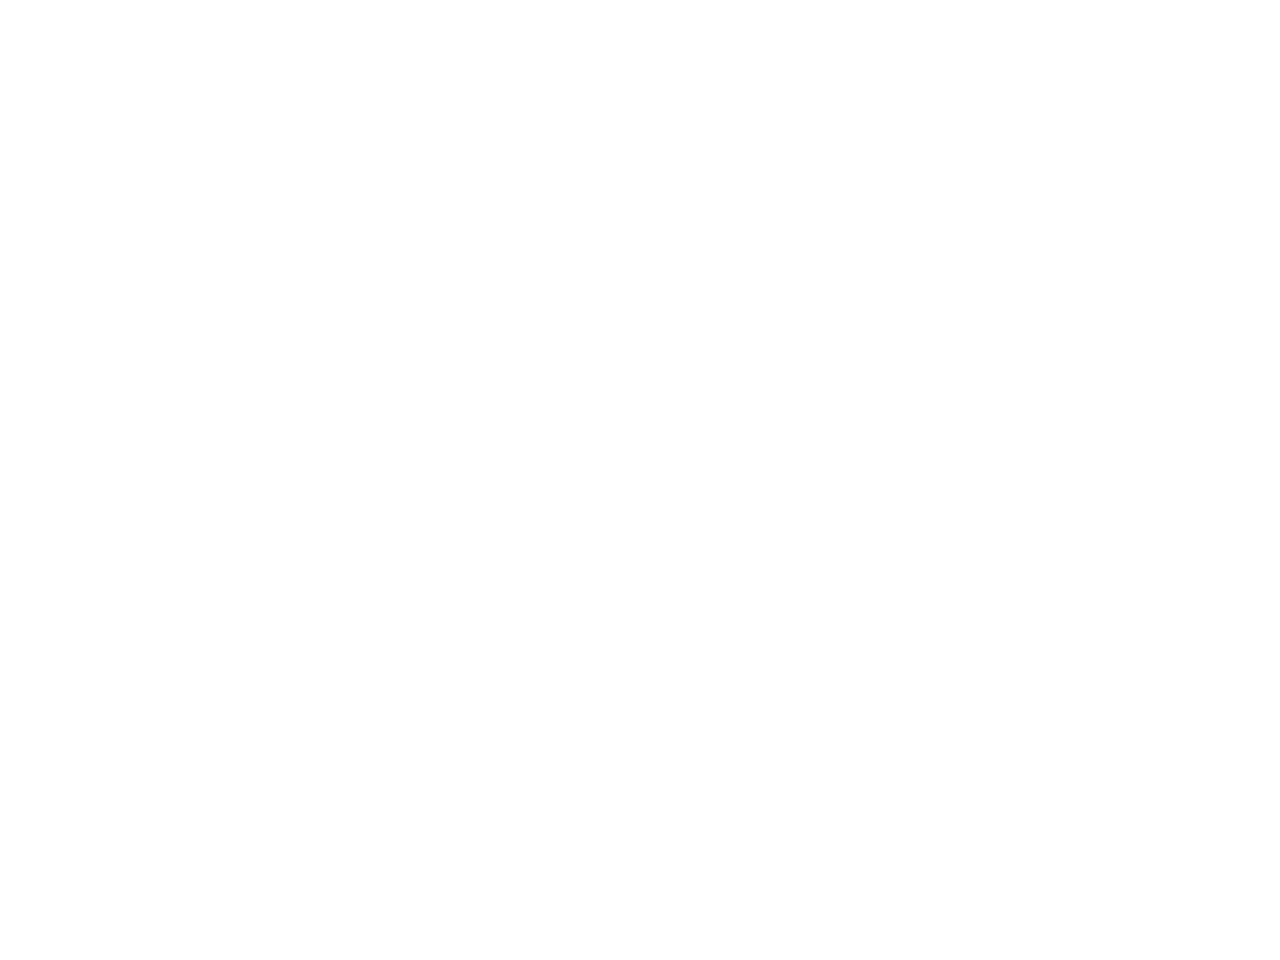

<IPython.core.display.Javascript object>


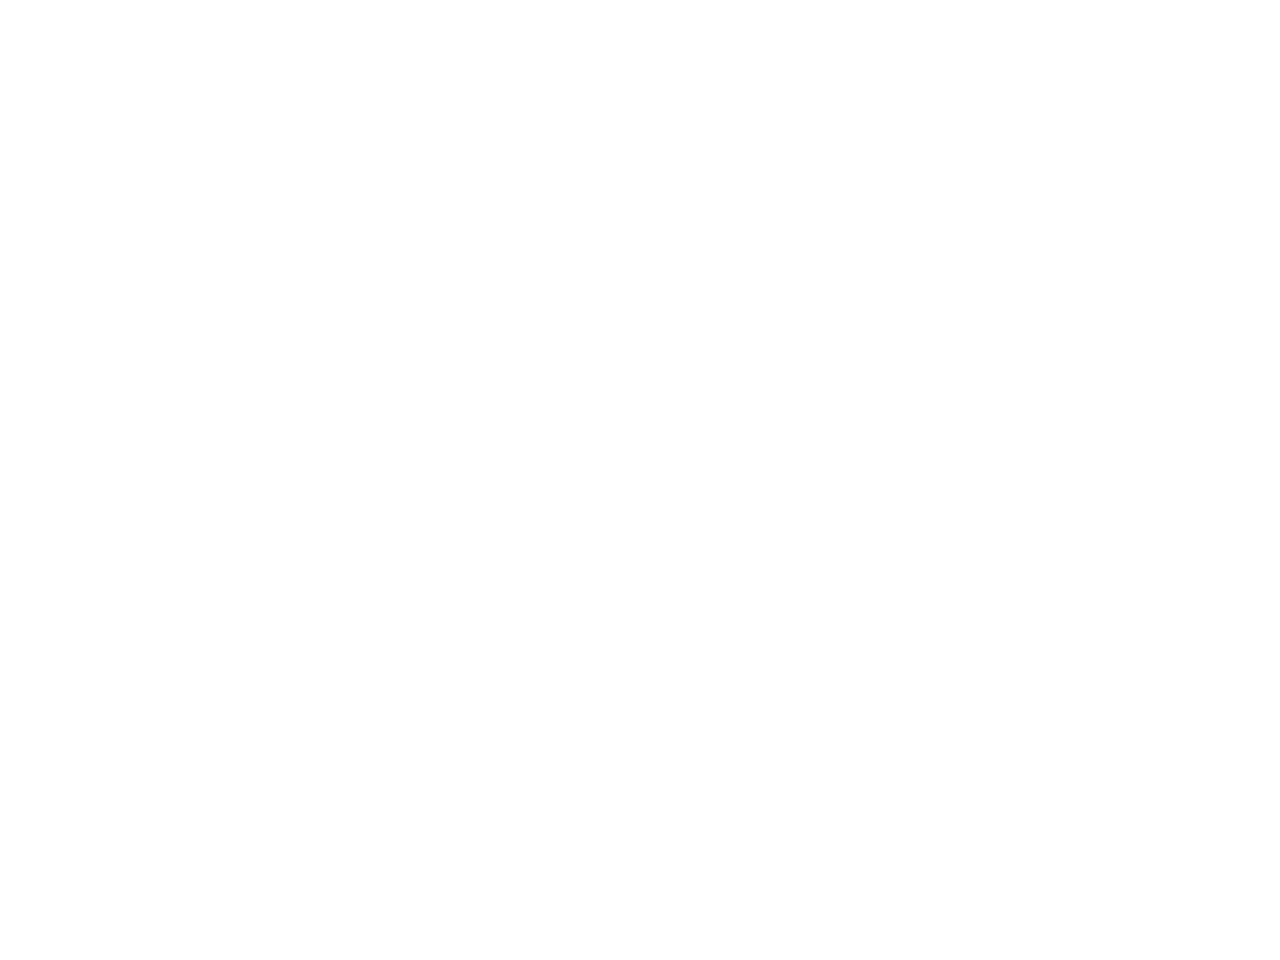

<IPython.core.display.Javascript object>


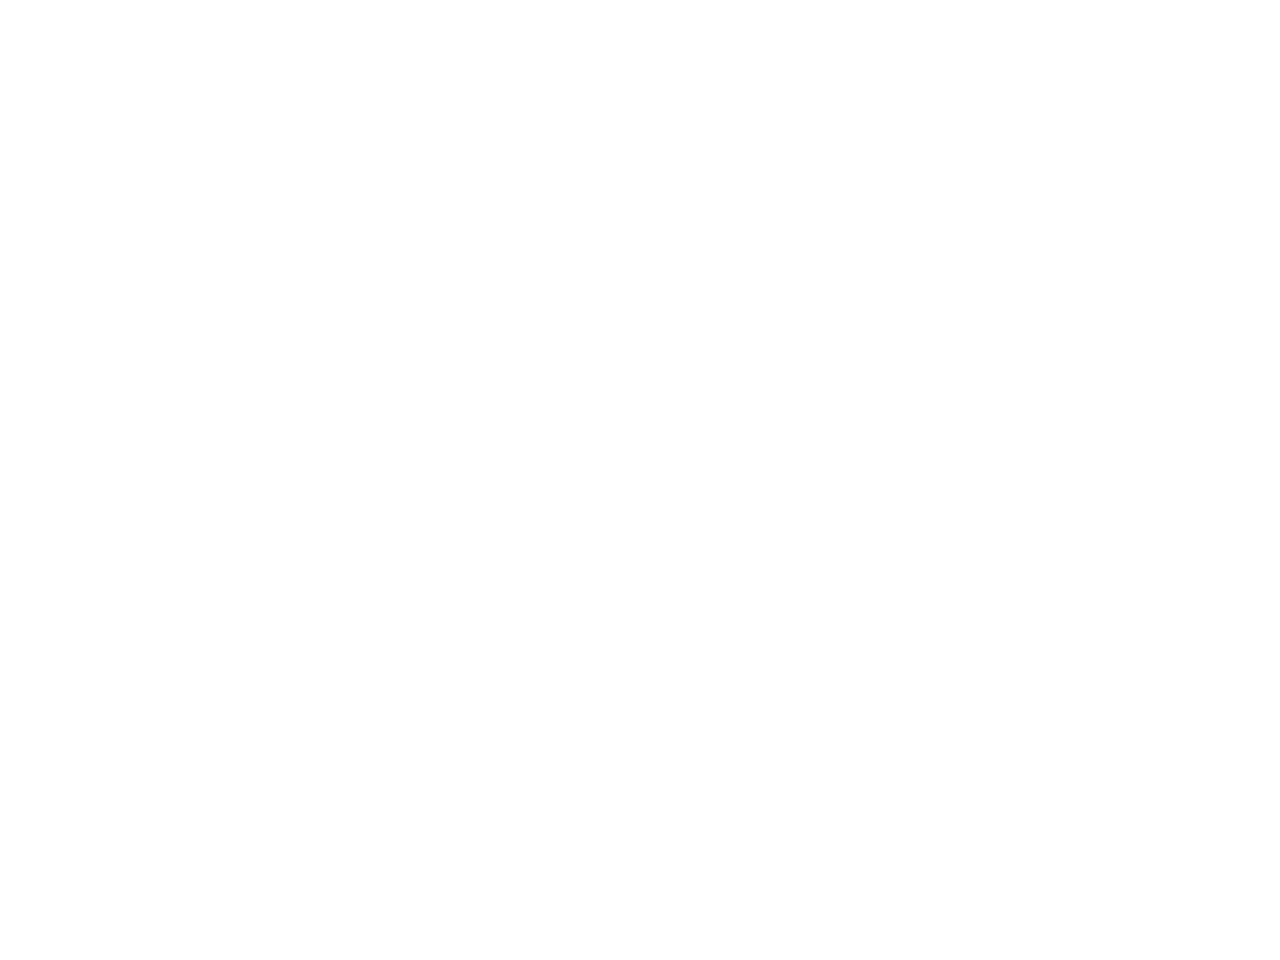

In [39]:
eva.plot_results(name + ".json", "precision")
eva.plot_results(name + ".json", "effort")

In [13]:
model = PAD(Z,pseudoy,3,X,plot=True)  

In [15]:
eva = Evaluation(y, expname="myExperiment")

for _ in range(5):
    Z1 = IsoForest(n_trees=1).fit(X).transform(X)
    My_pred=np.full((X.shape[0], 1), -1)
    anomaly_ind=np.argsort(Z1,axis=0)[-(int (0.1*X.shape[0])):]
    My_pred[anomaly_ind]=1
    pseudoy = np.ravel(My_pred ,order='C')
    clf = RandomForestClassifier(n_estimators=50, random_state=1)
    scores = clf.fit(X, pseudoy ).predict_proba(X)[:, 1]
    Z = np.asmatrix(scores)
    Z=np.transpose(Z)
    
    eva.run([PAD(Z,pseudoy,X)])

Total: 58 (15 anomalies, 43 nominals)

<IPython.core.display.Javascript object>


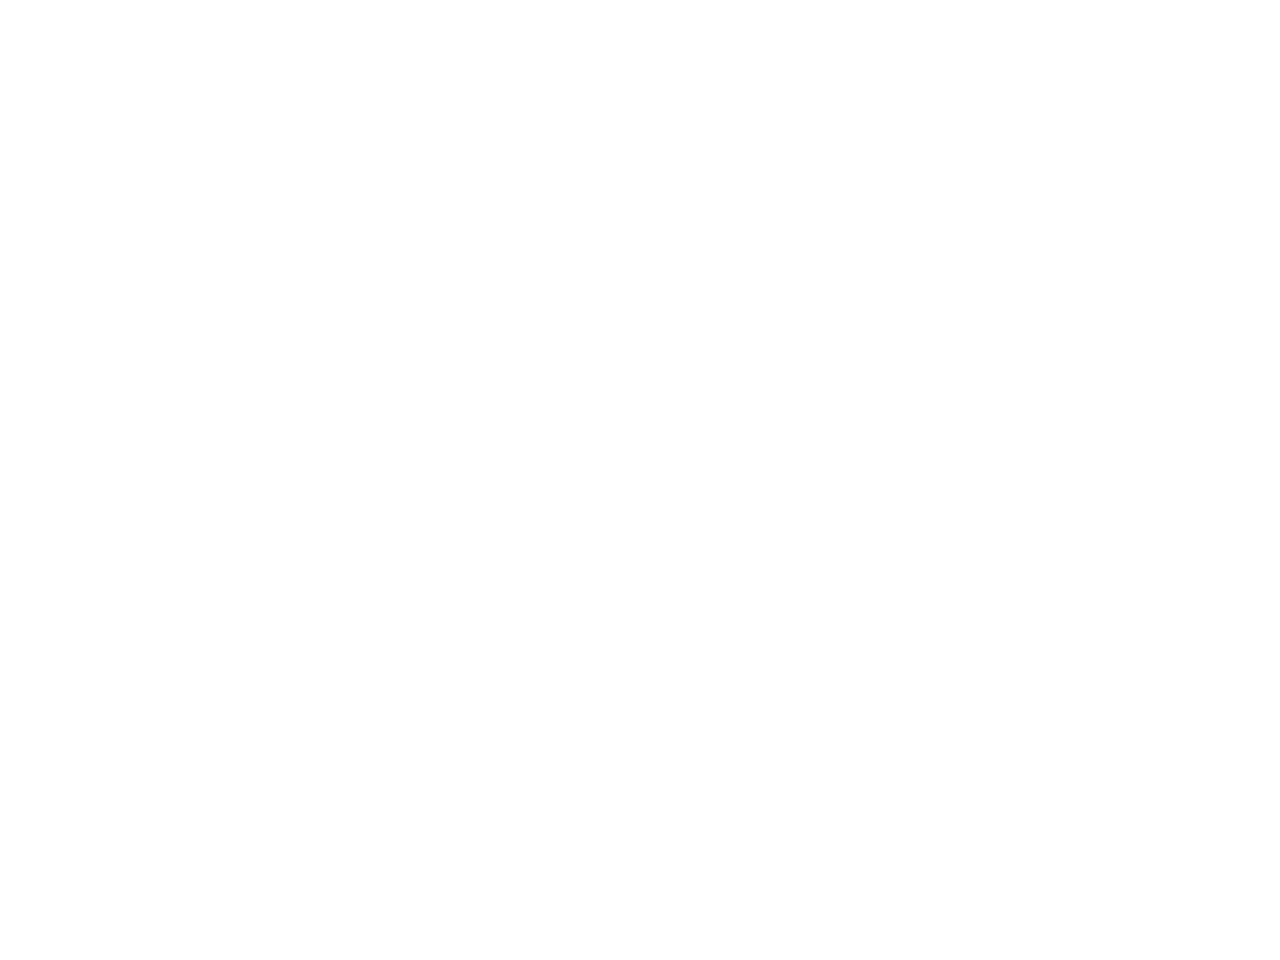

<IPython.core.display.Javascript object>


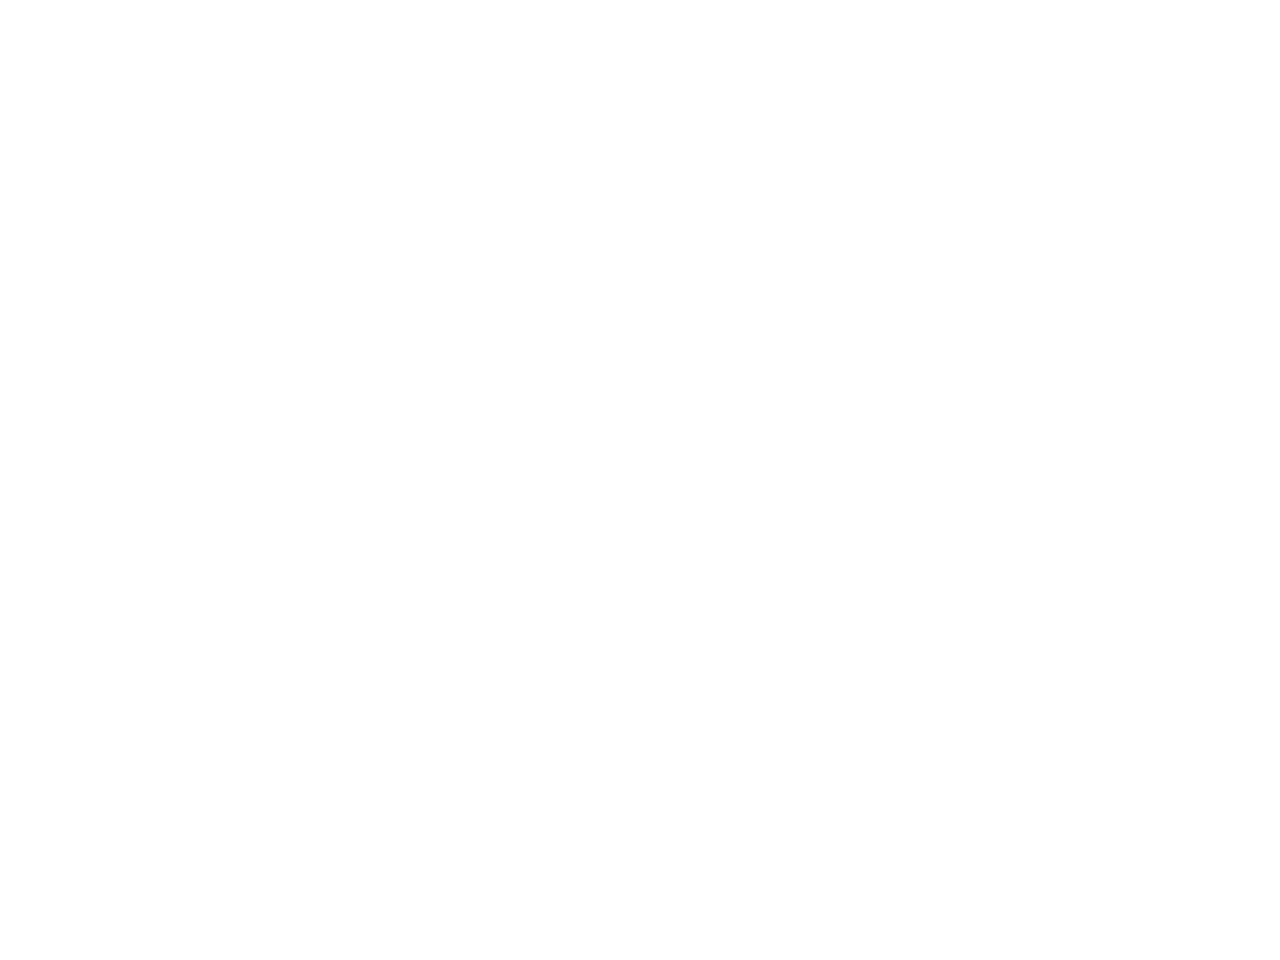

<IPython.core.display.Javascript object>


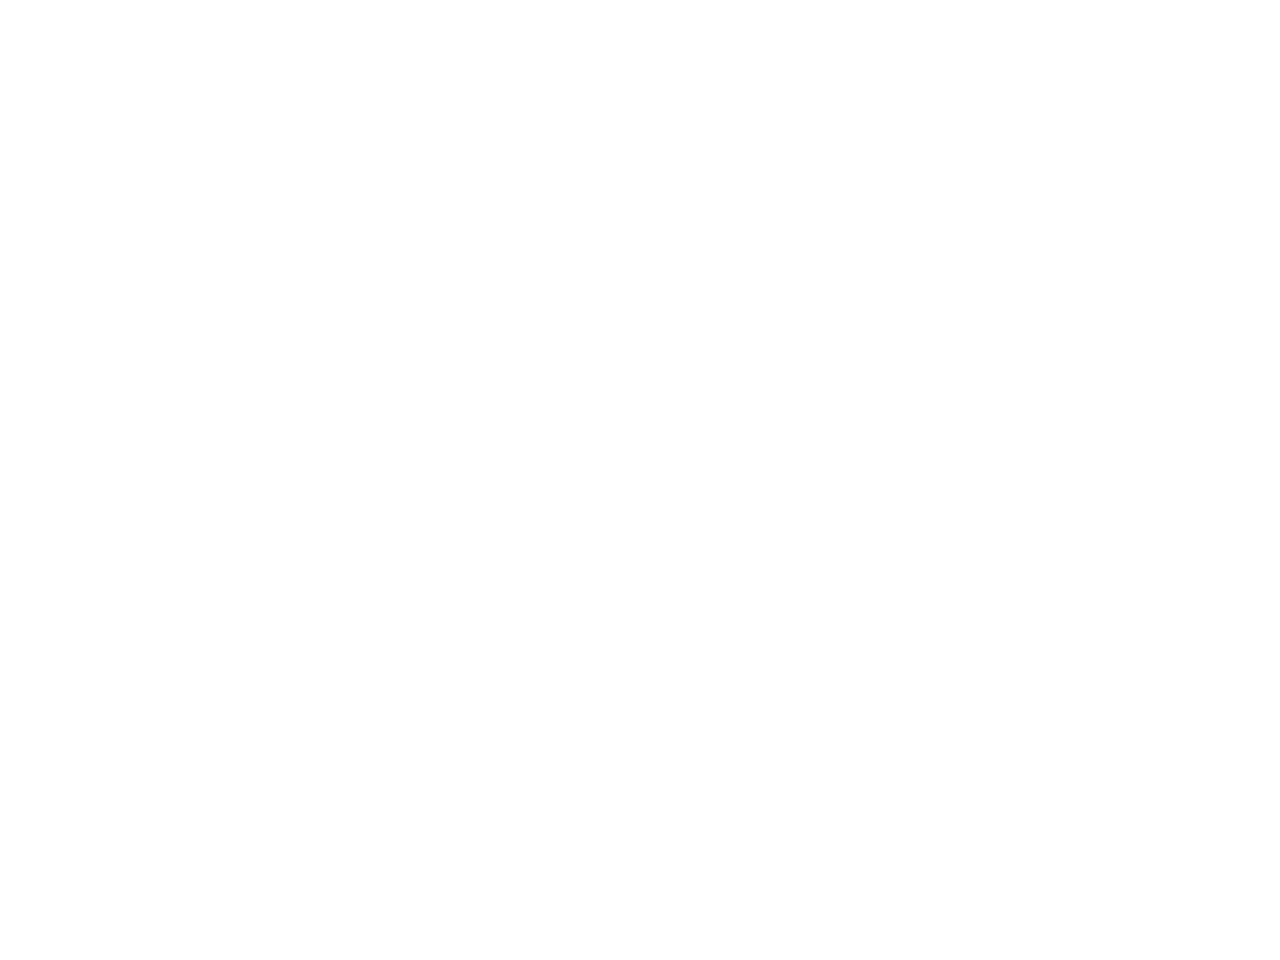

<IPython.core.display.Javascript object>


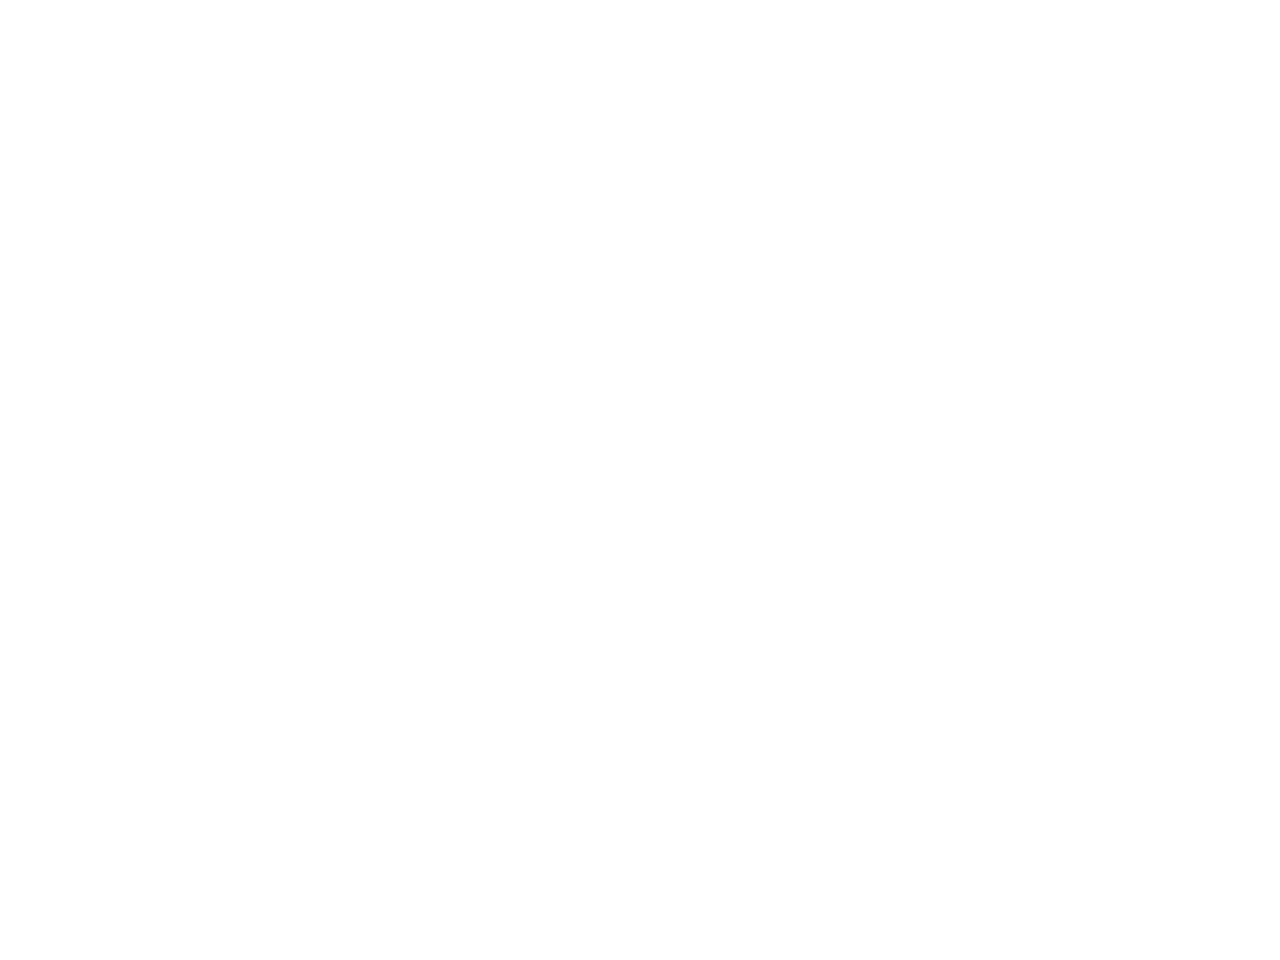

In [16]:
eva.plot_results("myExperiment.json", "precision")
eva.plot_results("myExperiment.json", "effort")

In [17]:
feedback_loop(model, y, budget=70)

Total: 1 (0 anomalies, 1 nominals)

<IPython.core.display.Javascript object>

ValueError: 'c' argument has 1920 elements, which is not acceptable for use with 'x' with size 1920, 'y' with size 1920.

In [32]:
'''
eva = Evaluation(y, expname="myExperiment")

for _ in range(5):
    Z1 = IsoForest(n_trees=1).fit(X).transform(X)
    My_pred=np.full((X.shape[0], 1), -1)
    anomaly_ind=np.argsort(Z1,axis=0)[-(int (0.1*X.shape[0])):]
    My_pred[anomaly_ind]=1
    pseudoy = np.ravel(My_pred ,order='C')
    clf = RandomForestClassifier(n_estimators=50, random_state=1)
    scores = clf.fit(X, pseudoy ).predict_proba(X)[:, 1]
    Z = np.asmatrix(scores)
    Z=np.transpose(Z)
    
    eva.run([PAD(Z,pseudoy,X)])'''
# k = sqrt n

Total: 58 (13 anomalies, 45 nominals)

Total: 1 (1 anomalies, 0 nominals)

<IPython.core.display.Javascript object>


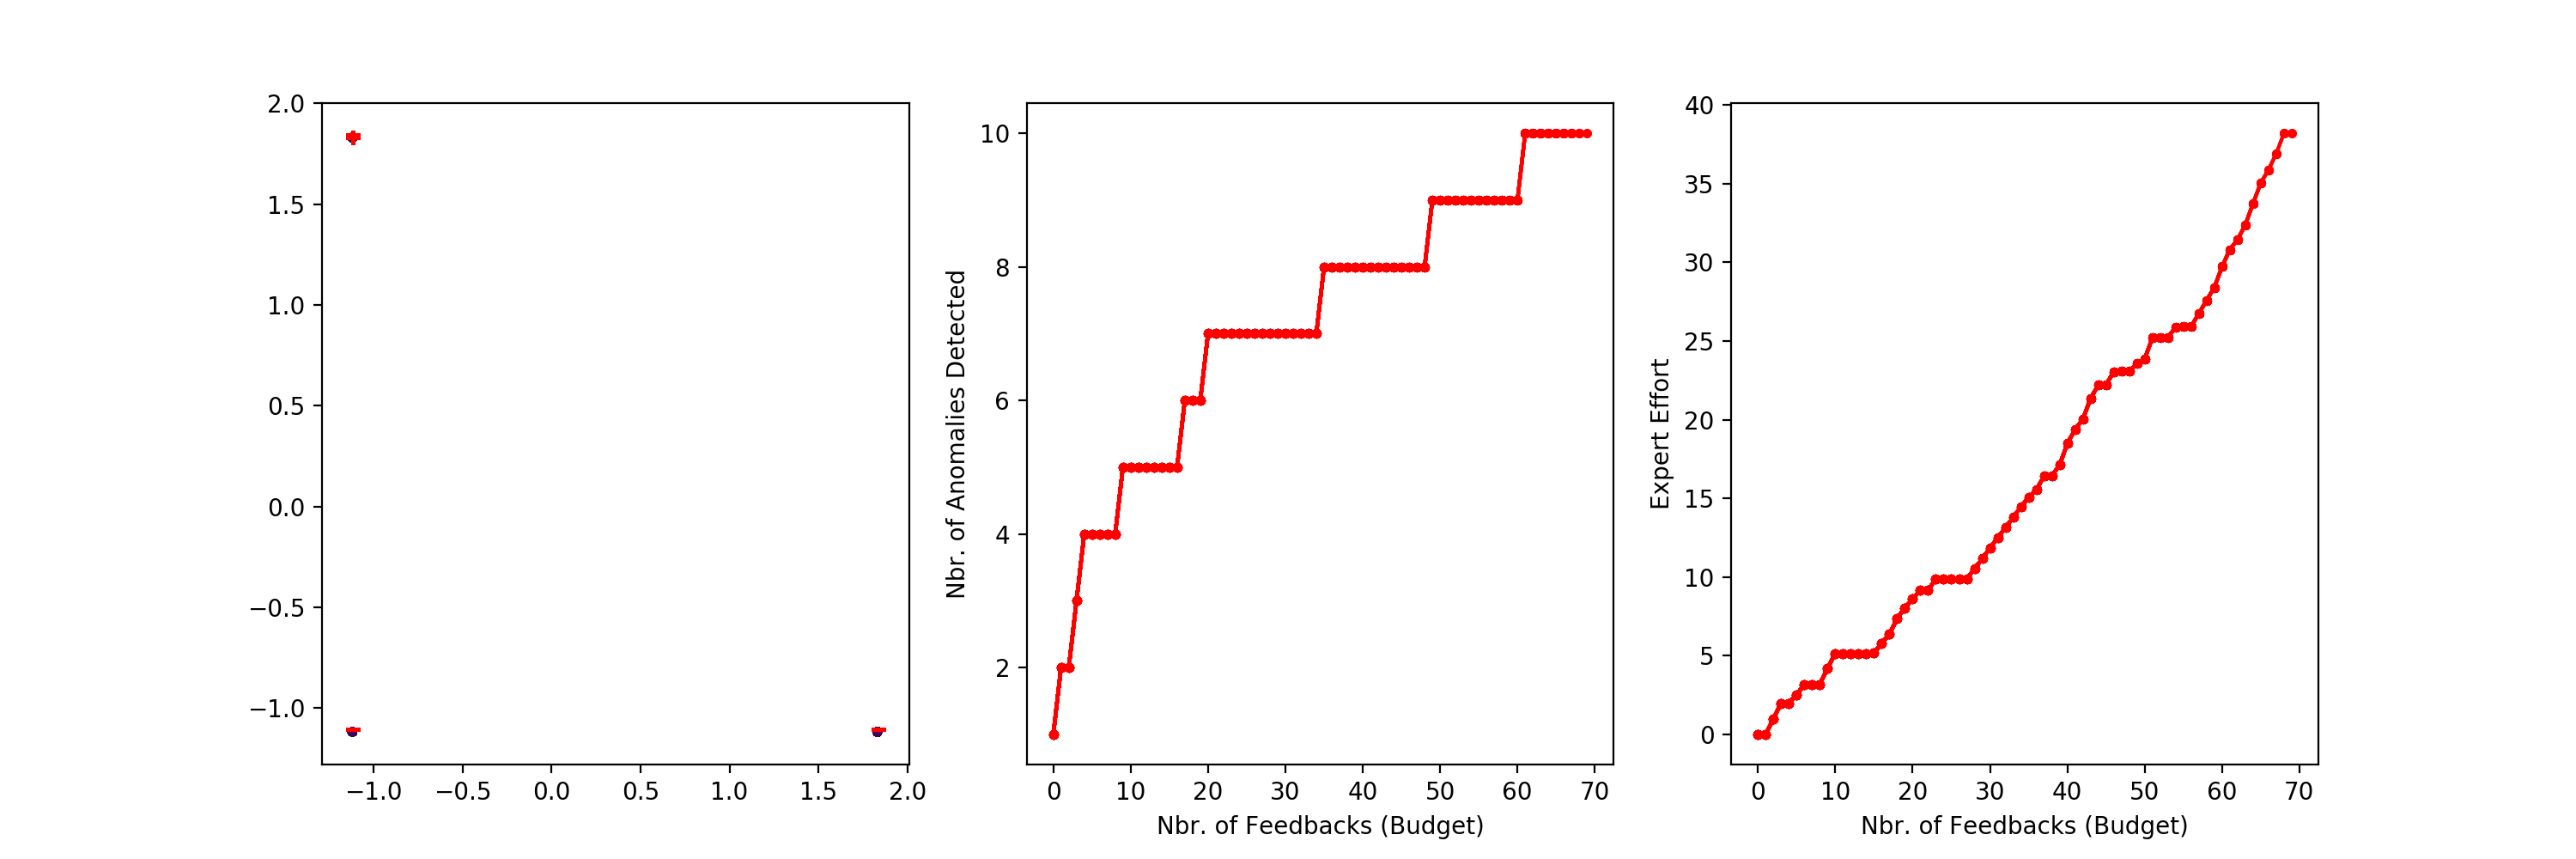

Total: 70 (10 anomalies, 60 nominals)

In [15]:
feedback_loop(model, y, budget=70)

In [16]:
feed

[252, 1208, 113, 345, 270]